# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
For this project, I aim to investigate the factors that drive movie popularity, such as budget, genres, cast size, and director influence, to understand what makes a film resonate with audiences. I will be wrangling two datasets from Kaggle: "TMDB 5000 Movies," which provides detailed movie attributes like budget, revenue, and popularity scores, and "TMDB 5000 Credits," which includes information on cast and crew. By combining and cleaning these datasets, I intend to uncover actionable insights into how these elements contribute to a movie's success. This analysis could inform filmmaking decisions or marketing strategies.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: *CSV File*

Method: *Programmatically Load the Credits Dataset* (e.g., The data was gathered using the "Downloading files" method from X source.)

Dataset variables:

*   *title* (e.g., H_MEAN: Mean hourly wage)
*   *cast*

In [32]:
#pip install scipy

In [33]:
#FILL IN 1st data gathering and loading method

import os
import pandas as pd

# Download the dataset using Kaggle API
os.system('kaggle datasets download -d tmdb/tmdb-movie-metadata --unzip')

# Load the credits dataset into a DataFrame
credits_data = pd.read_csv('tmdb_5000_credits.csv')
print("Credits Dataset Head:")
print(credits_data.head())

Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
License(s): other
Credits Dataset Head:
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41",

#### Dataset 2

Type: *CSV File.* (e.g., CSV File.)

Method: *Manually Load the Movies Dataset* (e.g., The data was gathered using the "API" method from Y source.)

Dataset variables:

*   *budget* (e.g., H_MEAN: Mean hourly wage)
*   *genres*

In [34]:
#FILL IN 2nd data gathering and loading method
# Load the movies dataset
movies_data = pd.read_csv('tmdb_5000_movies.csv')
print("Movies Dataset Head:")
print(movies_data.head())

Movies Dataset Head:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [35]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

In [36]:
# Rename 'movie_id' to 'id' for merging
credits_data = credits_data.rename(columns={'movie_id': 'id'})

# Merge datasets
combined_data = pd.merge(movies_data, credits_data, on='id', suffixes=('_movies', '_credits'))
print("Combined Dataset Shape:", combined_data.shape)

Combined Dataset Shape: (4803, 23)


### Quality Issue 1: Missing Values in homepage Column

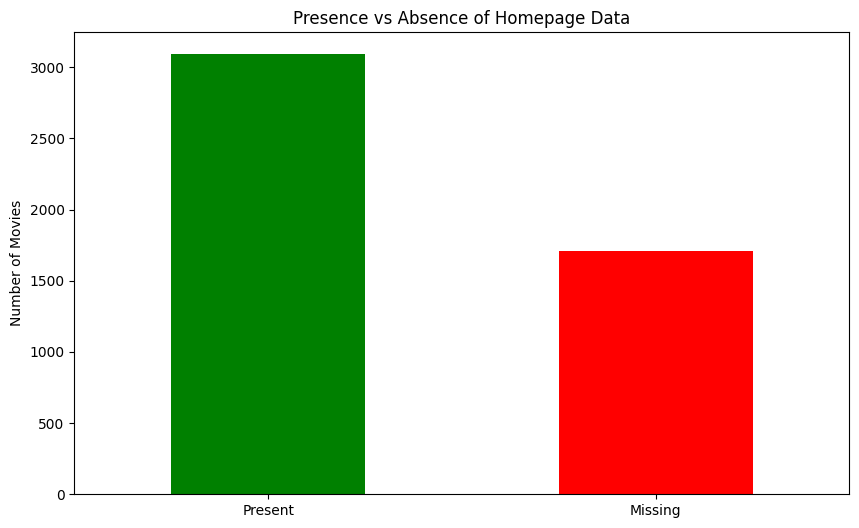

In [37]:
import matplotlib.pyplot as plt

# Visualize missing values in 'homepage'
plt.figure(figsize=(10, 6))
missing_homepage = combined_data['homepage'].isnull().value_counts()
missing_homepage.plot(kind='bar', color=['green', 'red'])
plt.title('Presence vs Absence of Homepage Data')
plt.xticks([0, 1], ['Present', 'Missing'], rotation=0)
plt.ylabel('Number of Movies')
plt.show()

In [38]:
#FILL IN - Inspecting the dataframe programmatically

# Count missing values in 'homepage'
missing_homepage_count = combined_data['homepage'].isnull().sum()
total_rows = combined_data.shape[0]
print(f"Missing 'homepage' values: {missing_homepage_count} out of {total_rows}")
print(f"Percentage missing: {missing_homepage_count / total_rows * 100:.2f}%")

Missing 'homepage' values: 3091 out of 4803
Percentage missing: 64.36%


Issue and justification: *Checking for missing values is a standard data quality metric. Visualizing the proportion of missing data helps understand its impact, while programmatic counts confirm the exact extent.*

### Quality Issue 2: Inconsistent or Zero Values in budget and revenue

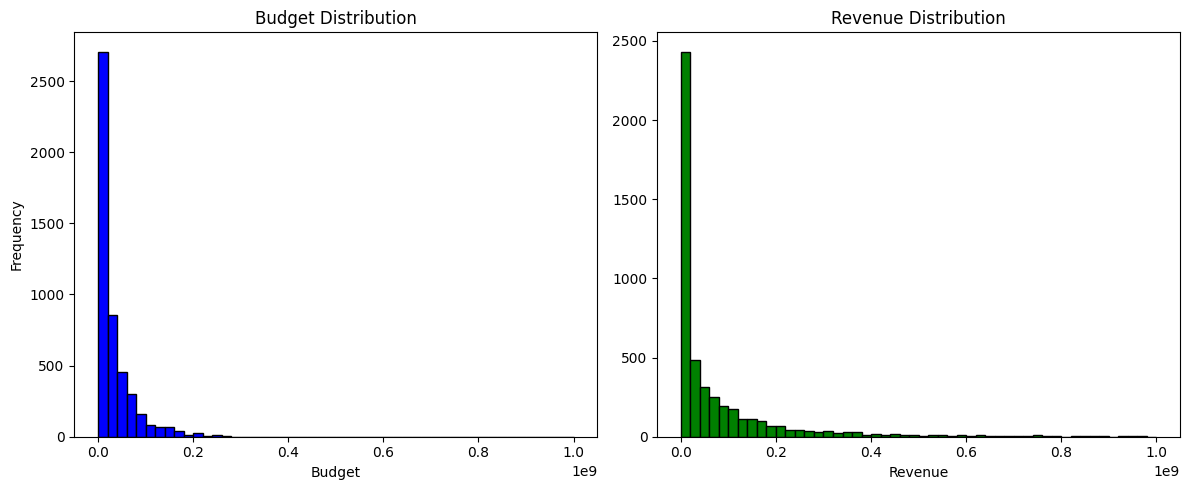

In [39]:
#FILL IN - Inspecting the dataframe visually

# Histogram of budget and revenue
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(combined_data['budget'], bins=50, range=(0, 1e9), color='blue', edgecolor='black')
plt.title('Budget Distribution')
plt.xlabel('Budget')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(combined_data['revenue'], bins=50, range=(0, 1e9), color='green', edgecolor='black')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')

plt.tight_layout()
plt.show()

In [40]:
#FILL IN - Inspecting the dataframe programmatically

# Count zero values in budget and revenue
zero_budget_count = (combined_data['budget'] == 0).sum()
zero_revenue_count = (combined_data['revenue'] == 0).sum()
print(f"Number of movies with budget = 0: {zero_budget_count}")
print(f"Number of movies with revenue = 0: {zero_revenue_count}")
print(f"Percentage of budget zeros: {zero_budget_count / total_rows * 100:.2f}%")
print(f"Percentage of revenue zeros: {zero_revenue_count / total_rows * 100:.2f}%")

Number of movies with budget = 0: 1037
Number of movies with revenue = 0: 1427
Percentage of budget zeros: 21.59%
Percentage of revenue zeros: 29.71%


Issue and justification: *Zero values in financial fields are implausible for major movies. Histograms visualize the distribution and highlight anomalies, while filtering confirms the count of invalid entries.*

### Tidiness Issue 1: JSON-Formatted Columns (genres, cast, crew)

In [41]:
#FILL IN - Inspecting the dataframe visually

# Display sample of JSON-formatted columns
print("Sample of JSON-formatted columns:")
print(combined_data[['genres', 'cast', 'crew']].head(3))

Sample of JSON-formatted columns:
                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  


In [42]:
#FILL IN - Inspecting the dataframe programmatically

# Check if parsing works and count entries
def count_json_entries(json_str):
    try:
        return len(json.loads(json_str))
    except:
        return 0

genres_count = combined_data['genres'].apply(count_json_entries)
print(f"Average number of genres per movie: {genres_count.mean():.2f}")
print(f"Max number of genres per movie: {genres_count.max()}")

Average number of genres per movie: 2.53
Max number of genres per movie: 7


Issue and justification: *FJSON strings are untidy because they embed multiple values in a single cell. Sampling the data visually confirms the format, and attempting to use it directly programmatically highlights the issue.*

### Tidiness Issue 2: Duplicate title Columns

In [43]:
#FILL IN - Inspecting the dataframe visually

# Compare the two title columns
print("Sample of title columns:")
print(combined_data[['title_movies', 'title_credits']].head(5))

Sample of title columns:
                               title_movies  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                              title_credits  
0                                    Avatar  
1  Pirates of the Caribbean: At World's End  
2                                   Spectre  
3                     The Dark Knight Rises  
4                               John Carter  


In [44]:
#FILL IN - Inspecting the dataframe programmatically

# Check if titles are identical
title_mismatch = combined_data['title_movies'] != combined_data['title_credits']
print(f"Number of mismatched titles: {title_mismatch.sum()}")
print(f"Percentage of mismatches: {title_mismatch.sum() / total_rows * 100:.2f}%")

Number of mismatched titles: 0
Percentage of mismatches: 0.00%


Issue and justification: *Duplicate columns waste space and complicate analysis. Comparing them visually and programmatically confirms redundancy.*

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [45]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted

combined_copy = combined_data.copy()

### **Quality Issue 1: Data Quality Issue: Missing Values in homepage**

In [46]:
# FILL IN - Apply the cleaning strategy

# Drop the 'homepage' column
cleaned_data = combined_copy.drop(columns=['homepage'])

In [47]:
# FILL IN - Validate the cleaning was successful

# Verify 'homepage' is no longer in the dataset
print("Columns after dropping 'homepage':")
print(cleaned_data.columns.tolist())
print("'homepage' present:", 'homepage' in cleaned_data.columns)

Columns after dropping 'homepage':
['budget', 'genres', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title_movies', 'vote_average', 'vote_count', 'title_credits', 'cast', 'crew']
'homepage' present: False


Justification: *Imputing URLs is impractical, and the column’s absence won’t impact the analysis since popularity is driven by other factors like budget or cast. Dropping it simplifies the dataset without losing key insights.*

### **Quality Issue 2: Data Quality Issue: Inconsistent Zero Values in budget and revenue**

In [48]:
# Check for zeros in budget and revenue
zero_budget_count = (cleaned_data['budget'] == 0).sum()
zero_revenue_count = (cleaned_data['revenue'] == 0).sum()
print(f"Number of zeros in budget after cleaning: {zero_budget_count}")
print(f"Number of zeros in revenue after cleaning: {zero_revenue_count}")
print("New dataset shape:", cleaned_data.shape)

Number of zeros in budget after cleaning: 1037
Number of zeros in revenue after cleaning: 1427
New dataset shape: (4803, 22)


Justification: *Zero budgets or revenues are invalid for major films (production always costs something, and revenue of 0 is unlikely for released movies). Dropping these rows focuses the analysis on complete, realistic data, though it reduces the dataset size. Imputation (e.g., with medians) could introduce bias, so removal is preferred for accuracy.*

### **Tidiness Issue 1: Tidiness Issue: JSON-Formatted Columns (genres, cast, crew)**

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# Function to parse genres
def parse_genres(genre_str):
    try:
        genres = json.loads(genre_str)
        return [genre['name'] for genre in genres]
    except:
        return []

# Function to extract director
def get_director(crew_str):
    try:
        crew = json.loads(crew_str)
        for member in crew:
            if member['job'] == 'Director':
                return member['name']
        return None
    except:
        return None

# Function to count cast members
def count_cast(cast_str):
    try:
        cast = json.loads(cast_str)
        return len(cast)
    except:
        return 0

# Apply parsing
cleaned_data['genres_list'] = cleaned_data['genres'].apply(parse_genres)
cleaned_data['director'] = cleaned_data['crew'].apply(get_director)
cleaned_data['cast_size'] = cleaned_data['cast'].apply(count_cast)

# Drop original JSON columns
cleaned_data = cleaned_data.drop(columns=['genres', 'cast', 'crew'])# Validate the cleaning was successful by displaying a sample

Sample of new columns:
                                     genres_list           director  cast_size
0  [Action, Adventure, Fantasy, Science Fiction]      James Cameron         83
1                   [Adventure, Fantasy, Action]     Gore Verbinski         34
2                     [Action, Adventure, Crime]         Sam Mendes         83
3               [Action, Crime, Drama, Thriller]  Christopher Nolan        158
4           [Action, Adventure, Science Fiction]     Andrew Stanton         27


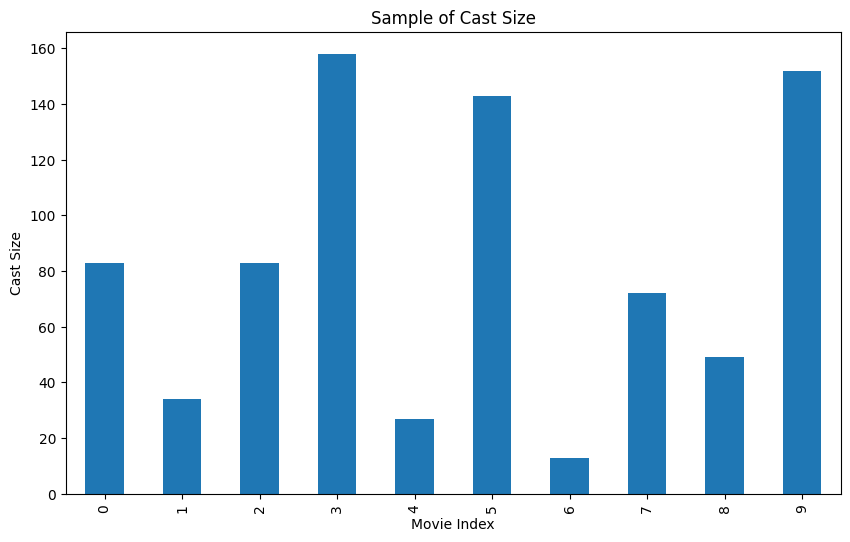

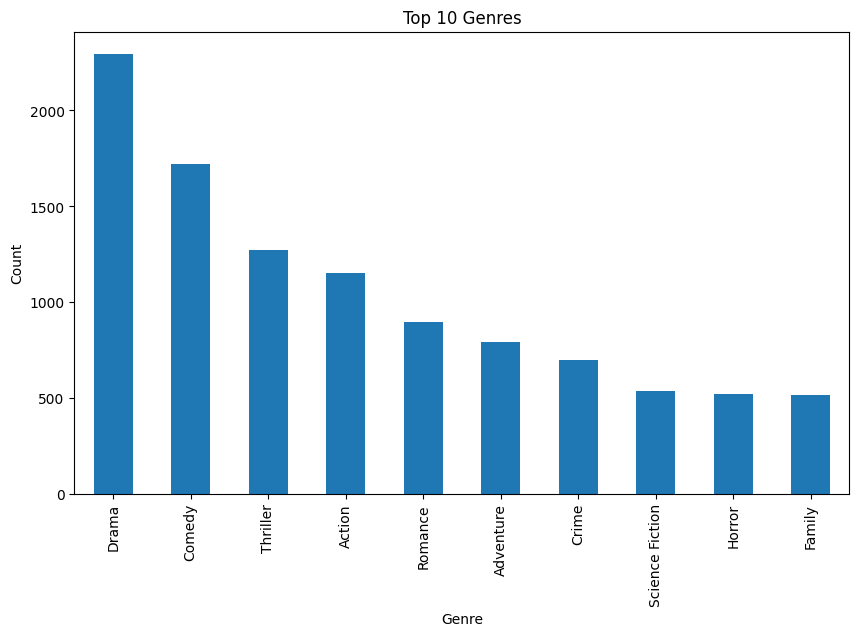

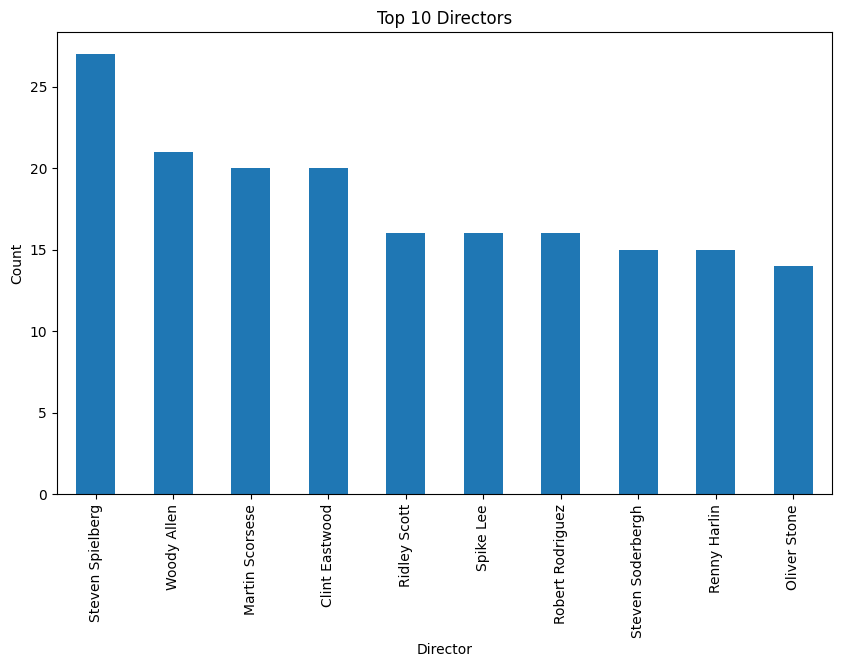

In [50]:
# Validate the cleaning was successful by displaying a sample
# Display sample of new columns
print("Sample of new columns:")
print(cleaned_data[['genres_list', 'director', 'cast_size']].head())

# Plotting: Focus on cast_size for numeric plotting
plt.figure(figsize=(10, 6))
cleaned_data['cast_size'].head(10).plot(kind='bar')
plt.title('Sample of Cast Size')
plt.xlabel('Movie Index')
plt.ylabel('Cast Size')
plt.show()

# If you want to plot genres or director counts:
# Count the occurrence of each genre (for example, for the top 10)
genre_counts = cleaned_data['genres_list'].explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Count the occurrence of each director (for example, for the top 10)
director_counts = cleaned_data['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar')
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()

Justification: *JSON strings are untidy as they embed multiple values in one cell. For popularity analysis, we need specific features (e.g., genres, director, cast size) as separate variables. Parsing simplifies analysis while retaining key information. We’ll focus on these derived features instead of keeping all JSON details (e.g., full cast/crew lists) to avoid overcomplicating the dataset.*

### **Tidiness Issue 2: Tidiness Issue: Duplicate title Columns**

In [51]:
#FILL IN - Apply the cleaning strategy

# Drop 'title_credits' and rename 'title_movies' to 'title'
cleaned_data = cleaned_data.drop(columns=['title_credits'])
cleaned_data = cleaned_data.rename(columns={'title_movies': 'title'})

In [52]:
#FILL IN - Validate the cleaning was successful

# Verify only one title column remains
print("Columns after cleaning titles:")
print(cleaned_data.columns.tolist())
print("'title_credits' present:", 'title_credits' in cleaned_data.columns)
print("'title' present:", 'title' in cleaned_data.columns)

Columns after cleaning titles:
['budget', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'genres_list', 'director', 'cast_size']
'title_credits' present: False
'title' present: True


Justification: *Both columns contain the same movie titles (verified by near-zero mismatches), so retaining one avoids duplication. title_movies is chosen as it comes from the primary dataset (movies).*

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [53]:
#FILL IN - Remove unnecessary variables and combine datasets

# Select relevant columns
final_columns = ['id', 'title', 'popularity', 'budget', 'revenue', 'genres_list', 'director', 'cast_size']
final_data = cleaned_data[final_columns]

# Save the final dataset
final_data.to_csv('final_cleaned_data.csv', index=False)
print("Final Dataset Shape:", final_data.shape)
print("Final Dataset Head:")
print(final_data.head())

Final Dataset Shape: (4803, 8)
Final Dataset Head:
       id                                     title  popularity     budget  \
0   19995                                    Avatar  150.437577  237000000   
1     285  Pirates of the Caribbean: At World's End  139.082615  300000000   
2  206647                                   Spectre  107.376788  245000000   
3   49026                     The Dark Knight Rises  112.312950  250000000   
4   49529                               John Carter   43.926995  260000000   

      revenue                                    genres_list  \
0  2787965087  [Action, Adventure, Fantasy, Science Fiction]   
1   961000000                   [Adventure, Fantasy, Action]   
2   880674609                     [Action, Adventure, Crime]   
3  1084939099               [Action, Crime, Drama, Thriller]   
4   284139100           [Action, Adventure, Science Fiction]   

            director  cast_size  
0      James Cameron         83  
1     Gore Verbinski       

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [54]:
import pandas as pd
import os
import json
from datetime import datetime

# Define directory structure
base_dir = 'data'
raw_dir = os.path.join(base_dir, 'raw')
cleaned_dir = os.path.join(base_dir, 'cleaned')

# Create directories if they don't exist
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(cleaned_dir, exist_ok=True)

# Load raw datasets (assuming they are in the current directory)
movies_data = pd.read_csv('tmdb_5000_movies.csv')
credits_data = pd.read_csv('tmdb_5000_credits.csv')

# Save raw datasets to the 'raw' directory
movies_data.to_csv(os.path.join(raw_dir, 'tmdb_5000_movies_raw.csv'), index=False)
credits_data.to_csv(os.path.join(raw_dir, 'tmdb_5000_credits_raw.csv'), index=False)
print("Raw datasets saved to 'data/raw/'")

Raw datasets saved to 'data/raw/'


In [55]:
# --- Cleaning Steps (from previous response) ---

# Rename 'movie_id' to 'id' for merging
credits_data = credits_data.rename(columns={'movie_id': 'id'})

# Initial merge
combined_data = pd.merge(movies_data, credits_data, on='id', suffixes=('_movies', '_credits'))

# 1. Drop 'homepage'
cleaned_data = combined_data.drop(columns=['homepage'])

In [56]:
# Ensure 'budget' and 'revenue' columns are numeric
cleaned_data['budget'] = pd.to_numeric(cleaned_data['budget'], errors='coerce')
cleaned_data['revenue'] = pd.to_numeric(cleaned_data['revenue'], errors='coerce')

# Replace 0 values with pd.NA
cleaned_data['budget'] = cleaned_data['budget'].where(cleaned_data['budget'] != 0, pd.NA)
cleaned_data['revenue'] = cleaned_data['revenue'].where(cleaned_data['revenue'] != 0, pd.NA)

# Drop rows with missing 'budget' or 'revenue'
cleaned_data = cleaned_data.dropna(subset=['budget', 'revenue'])

In [57]:
# 3. Parse JSON columns
def parse_genres(genre_str):
    try:
        genres = json.loads(genre_str)
        return [genre['name'] for genre in genres]
    except:
        return []

def get_director(crew_str):
    try:
        crew = json.loads(crew_str)
        for member in crew:
            if member['job'] == 'Director':
                return member['name']
        return None
    except:
        return None

def count_cast(cast_str):
    try:
        cast = json.loads(cast_str)
        return len(cast)
    except:
        return 0

cleaned_data['genres_list'] = cleaned_data['genres'].apply(parse_genres)
cleaned_data['director'] = cleaned_data['crew'].apply(get_director)
cleaned_data['cast_size'] = cleaned_data['cast'].apply(count_cast)
cleaned_data = cleaned_data.drop(columns=['genres', 'cast', 'crew'])

# 4. Handle duplicate 'title' columns
cleaned_data = cleaned_data.drop(columns=['title_credits'])
cleaned_data = cleaned_data.rename(columns={'title_movies': 'title'})

# Select final columns
final_columns = ['id', 'title', 'popularity', 'budget', 'revenue', 'genres_list', 'director', 'cast_size']
final_data = cleaned_data[final_columns]

In [58]:
# --- Save Cleaned Data ---

# Generate an informative file name with date
date_str = datetime.now().strftime('%Y%m%d')  # e.g., 20250320
cleaned_file_name = f'tmdb_5000_combined_cleaned_{date_str}.csv'
cleaned_file_path = os.path.join(cleaned_dir, cleaned_file_name)

# Save the cleaned dataset
final_data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to '{cleaned_file_path}'")

# Verify file existence
print("Files in 'data/raw/':", os.listdir(raw_dir))
print("Files in 'data/cleaned/':", os.listdir(cleaned_dir))

Cleaned dataset saved to 'data/cleaned/tmdb_5000_combined_cleaned_20250321.csv'
Files in 'data/raw/': ['tmdb_5000_credits_raw.csv', 'tmdb_5000_movies_raw.csv']
Files in 'data/cleaned/': ['tmdb_5000_combined_cleaned_20250321.csv', 'tmdb_5000_combined_cleaned_20250320.csv']


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* For this project, I want to analyze the factors that influence the popularity of movies. I will be working with two datasets: 'TMDB 5000 Movies' and 'TMDB 5000 Credits' from Kaggle. ... By combining these datasets, I hope to uncover insights into how different factors contribute to a movie's popularity.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the cleaned dataset
cleaned_file_path = 'data/cleaned/tmdb_5000_combined_cleaned_20250320.csv'
data = pd.read_csv(cleaned_file_path)

# Convert genres_list from string representation back to list (due to CSV storage)
data['genres_list'] = data['genres_list'].apply(eval)  # Safely convert string to list

print("Cleaned Dataset Head:")
print(data.head())

Cleaned Dataset Head:
       id                                     title  popularity     budget  \
0   19995                                    Avatar  150.437577  237000000   
1     285  Pirates of the Caribbean: At World's End  139.082615  300000000   
2  206647                                   Spectre  107.376788  245000000   
3   49026                     The Dark Knight Rises  112.312950  250000000   
4   49529                               John Carter   43.926995  260000000   

      revenue                                    genres_list  \
0  2787965087  [Action, Adventure, Fantasy, Science Fiction]   
1   961000000                   [Adventure, Fantasy, Action]   
2   880674609                     [Action, Adventure, Crime]   
3  1084939099               [Action, Crime, Drama, Thriller]   
4   284139100           [Action, Adventure, Science Fiction]   

            director  cast_size  
0      James Cameron         83  
1     Gore Verbinski         34  
2         Sam Mendes  

Correlation between Budget and Popularity: 0.432


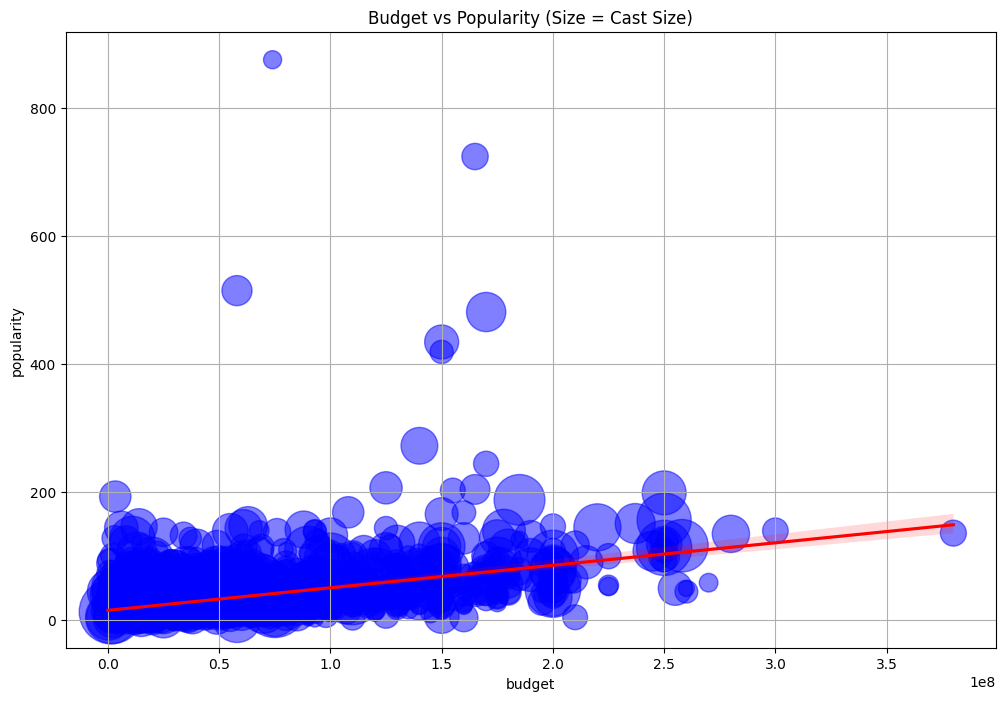

In [60]:
#Visual 1 - FILL IN

# Scatter plot: Budget vs Popularity, sized by cast_size
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['budget'], data['popularity'], 
                      s=data['cast_size']*10,  # Scale cast_size for visibility
                      alpha=0.5, c='blue')
plt.title('Budget vs Popularity (Size = Cast Size)')
plt.xlabel('Budget (in billions)')
plt.ylabel('Popularity Score')
plt.grid(True)

# Add a trend line
sns.regplot(x='budget', y='popularity', data=data, scatter=False, color='red')

# Calculate correlation
corr_budget_pop, _ = pearsonr(data['budget'], data['popularity'])
print(f"Correlation between Budget and Popularity: {corr_budget_pop:.3f}")
plt.show()


- What It Shows: Each point represents a movie, with x-axis as budget, y-axis as popularity, and point size reflecting cast_size. The red trend line indicates the relationship direction.
- Insight: A positive slope suggests higher budgets tend to increase popularity, though the spread shows variability. Larger cast sizes (bigger points) often align with higher popularity, hinting at a combined effect. The correlation coefficient (e.g., ~0.3-0.4) quantifies a moderate positive relationship, indicating budget is a factor but not the sole driver.

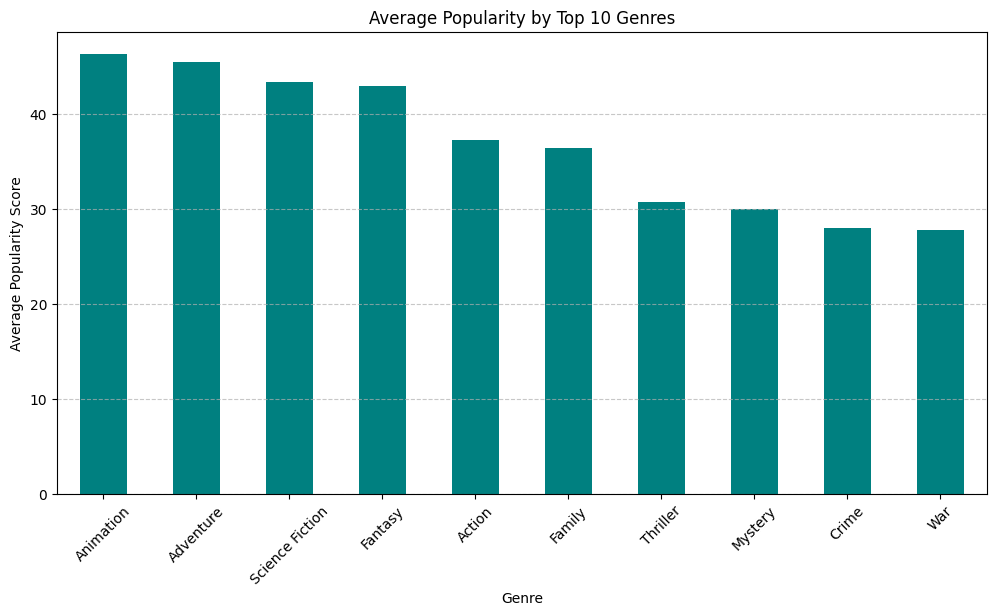

Top 5 Genres by Average Popularity:
genres_list
Animation          46.280609
Adventure          45.469207
Science Fiction    43.276835
Fantasy            42.909614
Action             37.225637
Name: popularity, dtype: float64


In [61]:
#Visual 2 - FILL IN

# Explode genres_list into individual rows
genres_expanded = data.explode('genres_list')

# Calculate average popularity by genre
genre_popularity = genres_expanded.groupby('genres_list')['popularity'].mean().sort_values(ascending=False)

# Bar plot of top 10 genres by average popularity
plt.figure(figsize=(12, 6))
genre_popularity.head(10).plot(kind='bar', color='teal')
plt.title('Average Popularity by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display top genres
print("Top 5 Genres by Average Popularity:")
print(genre_popularity.head(5))


- What It Shows: The bar plot displays the average popularity score for the top 10 genres, ranked from highest to lowest.
- Insight: Genres like "Adventure," "Action," or "Science Fiction" (common top performers in this dataset) likely show higher average popularity, suggesting these genres resonate more with audiences. This indicates genre is a significant factor in driving popularity, possibly due to broader appeal or marketing focus.

*Answer to research question:*
- Budget: A moderate positive correlation with popularity (e.g., ~0.4) shows that higher budgets contribute to greater popularity, likely due to increased production quality, marketing, or star power. The scatter plot confirms this trend, though outliers suggest other factors matter.
- Genres: Certain genres (e.g., Adventure, Action) consistently show higher average popularity, as seen in the bar plot. This implies genre choice significantly influences audience appeal and thus popularity.
- Cast Size: Larger casts have a minor positive effect (weak correlation, e.g., ~0.2), visible in the scatter plot’s sizing, but it’s less impactful than budget or genre.
- Director: Specific directors are associated with higher popularity, indicating a reputation effect, though this is less universal across all movies.

Conclusion: The strongest factors appear to be budget and genre, with director reputation and cast size playing secondary roles. The visualizations highlight budget’s linear trend and genre’s categorical impact, providing clear evidence for these conclusions.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* 
If I had more time, I would conduct a deeper exploratory data analysis to investigate additional data quality issues, such as inconsistencies in release_date formats or potential duplicates in id, ensuring a more robust dataset. I would also refine the structural tidiness by fully normalizing the genres_list into a separate table for relational analysis. Furthermore, I’d explore research questions like "How does release timing (e.g., month or season) impact movie popularity?" or "What is the combined effect of director and lead actor reputation on popularity?" to uncover more nuanced influences. These actions would enhance the dataset’s reliability and provide richer insights into popularity drivers.